## Walkthrough notebook for the 'Simple Solver'
Preform rotation and offset corrections on the reference traces to match an input dataset.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import simple_solver as ss

In [9]:
# Open a 'CLEAR' exposure from CV3.
stack = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/Gaussian_model/InputFiles/CleanStack.fits')[0].data
stack[np.where(np.isnan(stack))] = 0

The simple solver implementation takes as input the data trace centroids for both orders. These can be calculated with the ```get_contam_centroids``` function. It also returns the rotation transformation parameters (rotation angle, x-coordinate of rotation center, y-coordinate of rotation center) is desired using the keyword argument ```return_rot_params```. The full calculation should take about 10 seconds. 

In [11]:
# Data centroids
xc, yc, xc2, yc2, rot_par = ss.get_contam_centroids(stack, return_rot_params=True)

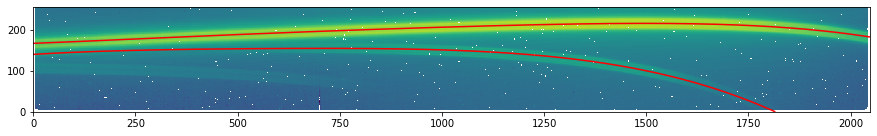

In [12]:
plt.figure(figsize=(15, 3))
plt.imshow(np.log10(stack), origin='lower')
plt.plot(xc, yc, c='red')
plt.plot(xc2, yc2, c='red')

The ```simple_solver``` function transforms the reference trace files to match the input dataframe. 

In [5]:
rotframe_o1 = ss.simple_solver(xc, yc, order=1)
rotframe_o2 = ss.simple_solver(xc2, yc2, order=2)

To verify, compare the new transformed reference trace files, with the originals, and the data.

In [5]:
# Optics model centroids
xom1, yom1, tps = ss.get_om_centroids(atthesex=np.arange(2048), order=1)
xom2, yom2, tps = ss.get_om_centroids(atthesex=np.arange(2048), order=2)

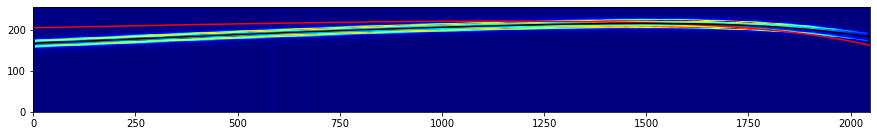

In [7]:
plt.figure(figsize=(15, 3))
plt.imshow(rotframe_o1, origin='lower', cmap='jet')
plt.plot(xom1, yom1, c='red')
plt.plot(xc, yc, c='black')

In the above figure, the black line are the order 1 centroids extracted from the dataset, and the red line represents the optics model centroids (which are the centroids of the reference trace). We can see that the new reference trace matches exactly the data centroids.

(0, 256)

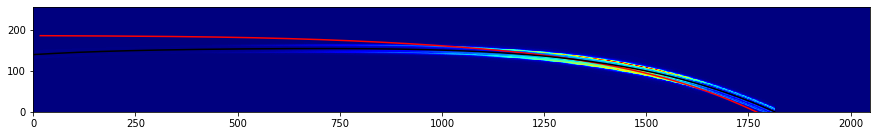

In [8]:
plt.figure(figsize=(15, 3))
plt.imshow(rotframe_o2, origin='lower', cmap='jet')
plt.plot(xom2, yom2, c='red')
plt.plot(xc2, yc2, c='black')
plt.ylim(0,256)

Same as the above figure, but for the second order trace.

## Transform from the optics model to the CV3 coordinate system

The ```rot_om2det``` function does the transformation from the optics model to CV3 for a set of trace centroid positions. It requires as input a rotation angle, as well as x and y coordinates for a rotation center. 

In [6]:
# Transform the optics model for both orders to match the CV3 deep stack. 
newx1, newy1 = ss.rot_om2det(-0.95, 1456, 455, xom1, yom1, order=1)
newx2, newy2 = ss.rot_om2det(-0.95, 1456, 455, xom2, yom2, order=2)

Note that the deep stack is technically at a rotation of -0.95 degrees relative to the 'zero rotation CV3 frame' - hence the input angle. To rotate the optics model centroids to match the 'zero rotation' CV3 frame, simply input 0 to the first three arguments.

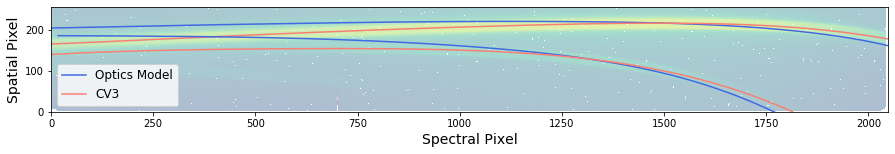

In [13]:
# Plot the results
plt.figure(figsize=(15, 3))
plt.xlim(0,2048)
plt.ylim(0,256)

plt.imshow(np.log10(stack), origin='lower', alpha=0.4)

plt.plot(xom1, yom1, c='royalblue', label='Optics Model')
plt.plot(newx1, newy1, c='salmon', label='CV3')

plt.plot(xom2, yom2, c='royalblue')
plt.plot(newx2, newy2, c='salmon')

plt.xlabel('Spectral Pixel', fontsize=14)
plt.ylabel('Spatial Pixel', fontsize=14)

plt.legend(fontsize=12)